In [1]:
%load_ext autoreload
%autoreload 2

from tweedejaars_project import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import *

df = load_df()
temp = df[110000:]

2024-06-12 16:28:28.935 | INFO     | tweedejaars_project.config:<module>:11 - PROJ_ROOT path is: /home/nub/tweedejaars_project


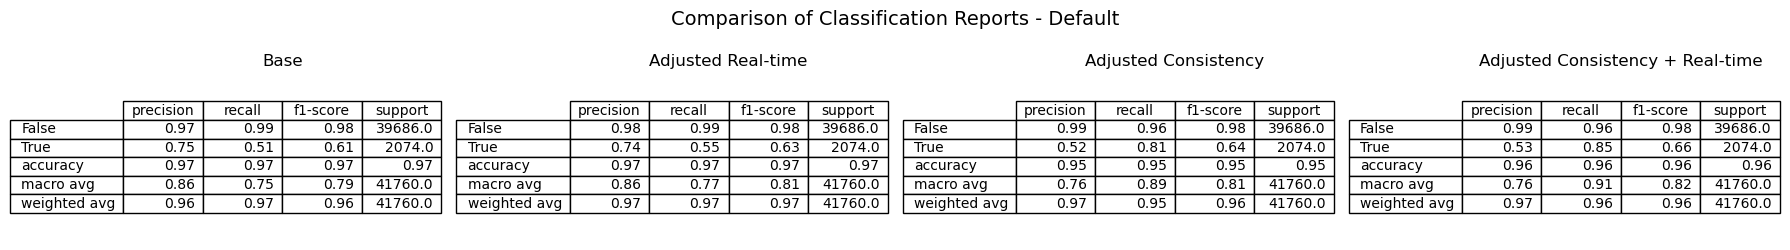

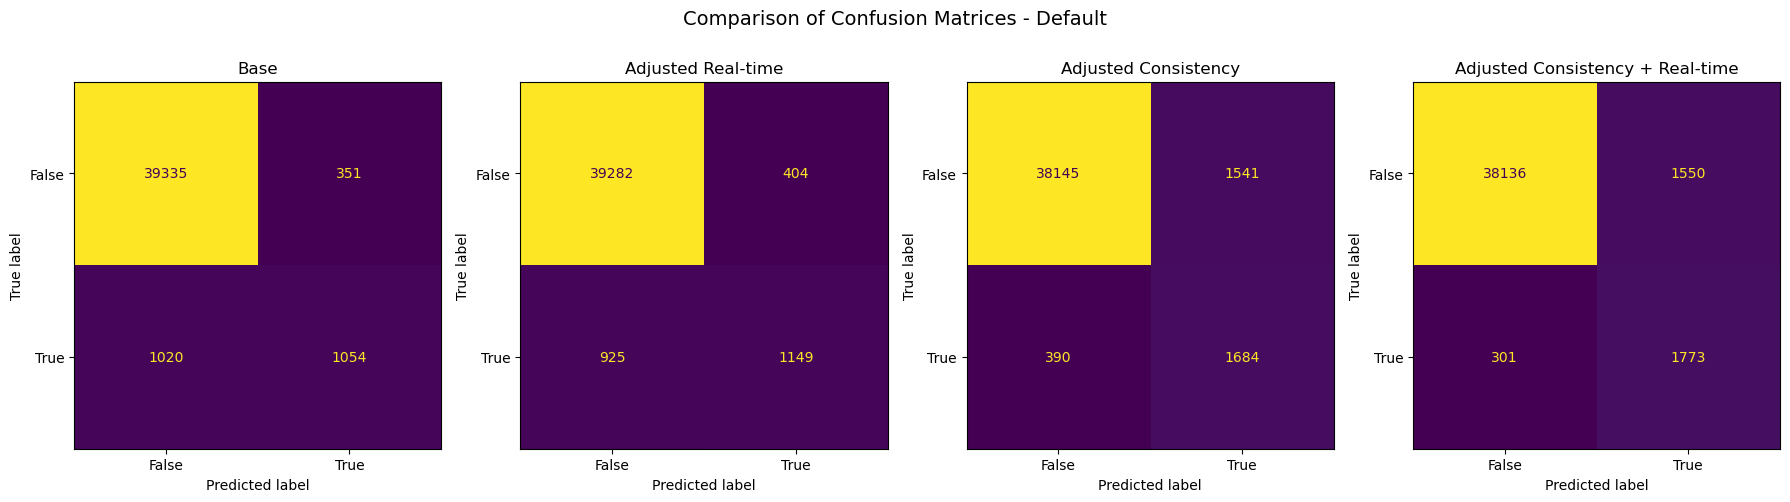

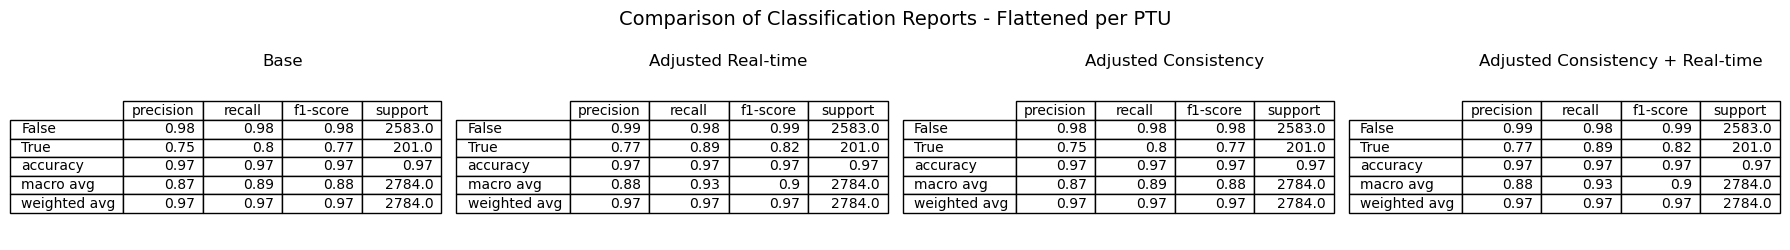

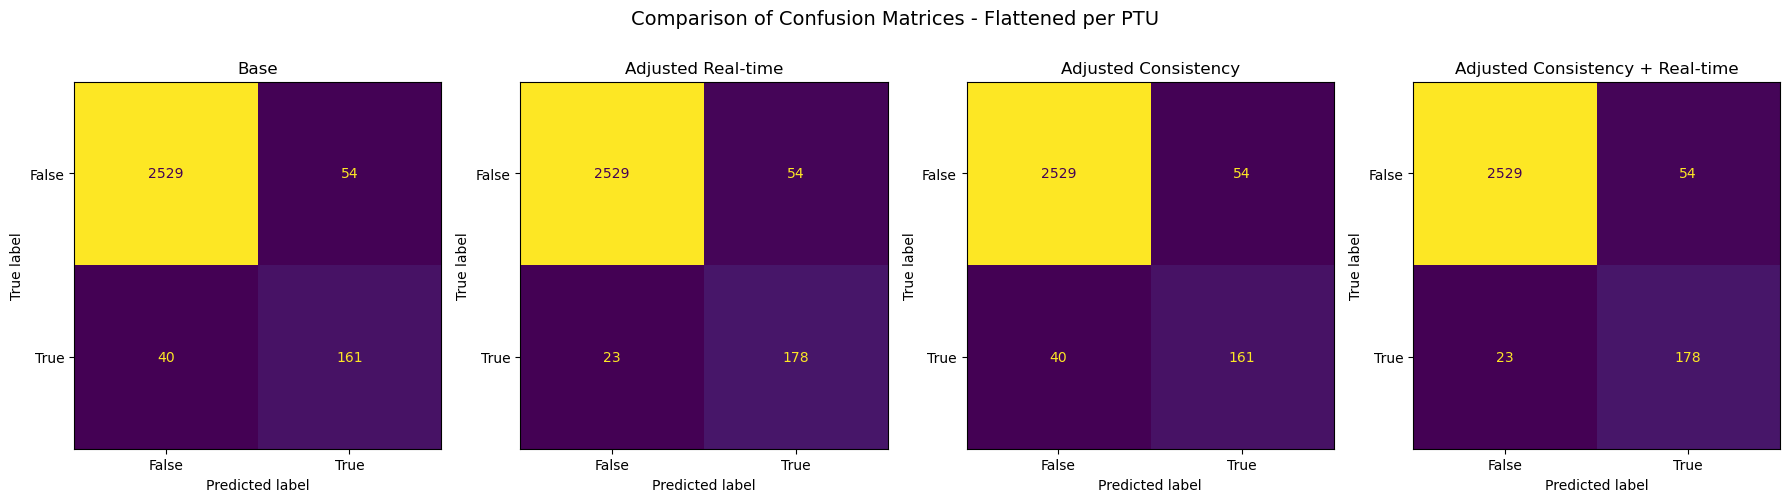

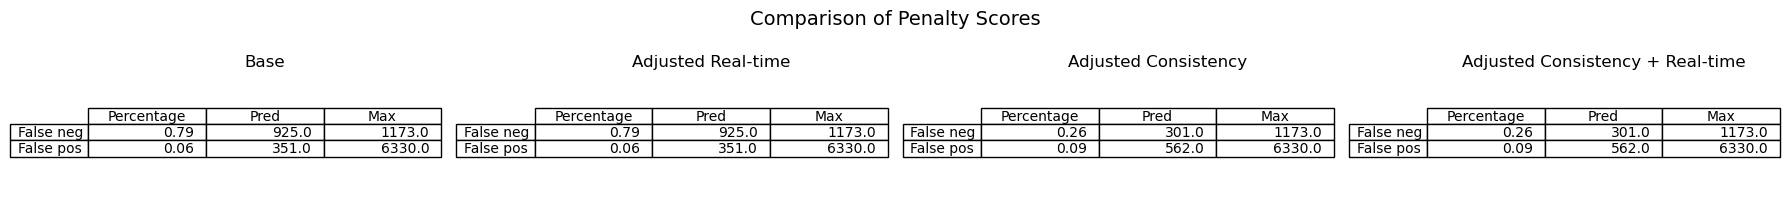

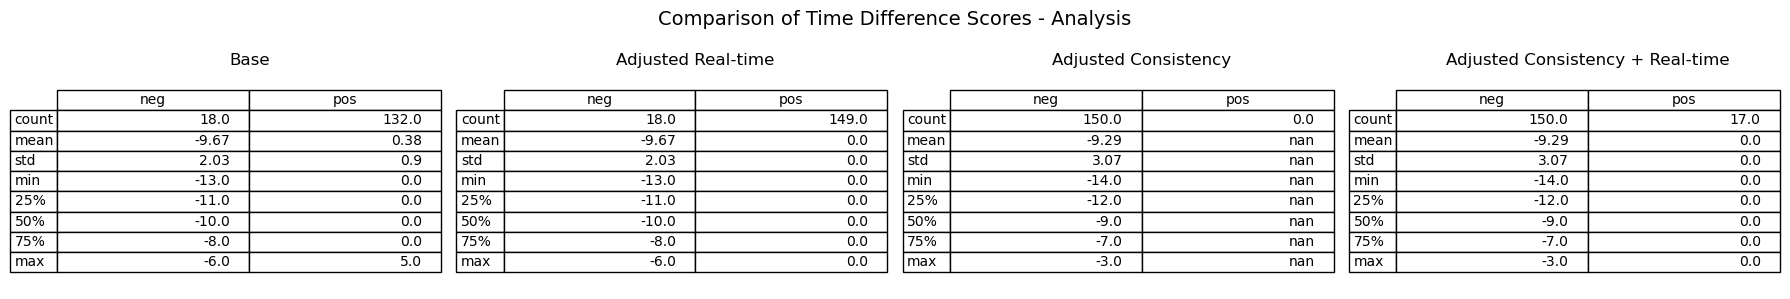

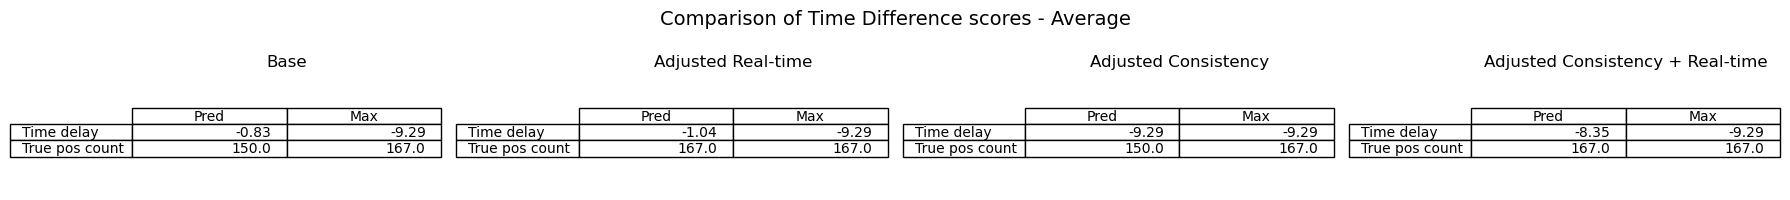

In [2]:
features = [
    'import_capacity',
    'min_price_published',
    'mid_price_published',
    'max_price_published',
    'min_ptu_price_known',
    'max_ptu_price_known',
    'settlement_price_bestguess',
    'time_since_last_two_sided',
    'two_sided_daily_count',
    'PTU',
    'naive_strategy_action',
    'forecast_wind',
    'forecast_solar',
    'forecast_demand',
    'target_two_sided_ptu_realtime'
]
splits = get_splits(df, features, return_dict_pair=False)
# m = RandomForestClassifier(n_estimators=50)
m = HistGradientBoostingRegressor(loss='poisson', l2_regularization=4)
m.fit(splits['train'][0], splits['train'][1])
p = m.predict(splits['valid'][0])
# print(pd.Series(p).describe())
p = p > 0.5
p = pd.Series(p, dtype=bool)
show_metrics_adjusted(splits['valid'][3], splits['valid'][1], p, splits['valid'][2])


# show_basic_metrics(splits['valid'][1], p, splits['valid'][2], False)
# show_real_penalty_score(splits['valid'][0], splits['valid'][1], p, splits['valid'][2])
# show_time_diff_score(splits['valid'][0], p, splits['valid'][2])


temp = df[110000:] # 110240 target is false maar is wel twoside
# False negative score (pred/max): 0.7635705669481303, 633/829
# False positive score (pred/max): 0.0851063829787234, 568/6674
# False negative score (pred/max): 0.6223358908780904, 730/1173
# False positive score (pred/max): 0.1622432859399684, 1027/6330
# split target and two side
# only check ptu start with neg or naive=true, for train or metric

In [3]:
df['fake_ptu'] = (df['ptu_id'] + 4) % 96 + 1
df['check'] = df['PTU'] == df['fake_ptu'] 
print(df['check'].all())
temp = df[133900:] # 133979 zomertijd jumpt van 8 naar 13

False


In [4]:
# Calculate the time difference between consecutive rows
df['time_diff'] = df['datetime'].diff()

# Check if all time differences are equal to one minute
is_every_minute = (df['time_diff'] == pd.Timedelta(minutes=1))[1:].all()
is_every_minute

True